# **Немецкий кредитный риск**
# Кредитная классификация

# **Описание**
Исходный набор данных содержит 1000 записей с 20 категориальными / символическими атрибутами, подготовленными профессором Хофманном. В этом наборе данных каждая запись представляет человека, который берет кредит в банке. Каждый человек классифицируется как хороший или плохой кредитный риск в соответствии с набором атрибутов.

# Заливка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown --id 1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020

Downloading...
From: https://drive.google.com/uc?id=1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020
To: /content/german-credit.csv
100% 50.5k/50.5k [00:00<00:00, 20.1MB/s]


## Предобработка

Age (numeric)  
Sex (text: male, female)  
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  
Housing (text: own, rent, or free)  
Saving accounts (text - little, moderate, quite rich, rich)  
Checking account (numeric, in DM - Deutsch Mark)  
Credit amount (numeric, in DM)  
Duration (numeric, in month)  
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)  
default (1 - bad, 0 - good)


Задание: проанализировать от чего зависит default

In [3]:
df = pd.read_csv('/content/german-credit.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.183
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

Сделаю техническую замену пропусков

In [8]:
df['saving_accounts'].fillna('no_info',inplace=True)

In [9]:
df['checking_account'].fillna('no_info',inplace=True)

In [10]:
df.isna().mean()

age                 0.0
sex                 0.0
job                 0.0
housing             0.0
saving_accounts     0.0
checking_account    0.0
credit_amount       0.0
duration            0.0
purpose             0.0
default             0.0
dtype: float64

## Анализ

In [11]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,no_info,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [12]:
df['age_group'] = pd.qcut(df['age'],5)

In [13]:
df.groupby('age_group')['default'].agg(['count','mean'])

,count,mean
age_group,,
"(18.999, 26.0]",240,0.391667
"(26.0, 30.0]",171,0.315789
"(30.0, 36.0]",216,0.259259
"(36.0, 45.0]",187,0.262032
"(45.0, 75.0]",186,0.252688


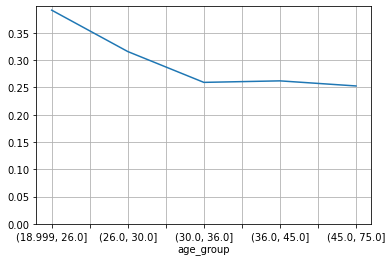

In [14]:
df.groupby('age_group')['default'].mean().plot(ylim=0,grid=True)

С увеличением возраста процент дефолтников снижается!

In [15]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(45.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]"


In [16]:
df.groupby('sex')['default'].agg(['count','mean'])

,count,mean
sex,,
female,310,0.351613
male,690,0.276812


Выборка перекошена -- мужчин в 2 раза больше чем женщин. И среди женщин дефолта сильно больше. Возможно влияние другой переменной? Возраст?

In [17]:
df.groupby('sex')['age'].agg(['count','mean','median'])

,count,mean,median
sex,,,
female,310,32.803226,29
male,690,36.778261,35


Действительно! Женщины в этой выборке моложе! Посмотрим в разрезе пола и возраста

In [18]:
df['age_group2'] = pd.qcut(df['age'],3)

In [19]:
df.groupby(['age_group2','sex'])['default'].agg(['count','mean'])

count      mean
age_group2     sex                    
(18.999, 28.0] female    154  0.409091
               male      180  0.327778
(28.0, 38.0]   female     83  0.385542
               male      263  0.235741
(38.0, 75.0]   female     73  0.191781
               male      247  0.283401

В молодом и среднем возрасте женщины хуже возвращают долг, а в более старшем наоборот: женщины возвращают долг лучше чем мужчины

In [20]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]"


0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [21]:
job_dict = {0:"unskilled and non-resident",
            1:"unskilled and resident",
            2:"skilled",
            3: "highly skilled"}

In [22]:
job_dict

{0: 'unskilled and non-resident',
 1: 'unskilled and resident',
 2: 'skilled',
 3: 'highly skilled'}

In [23]:
df['job'] = df['job'].map(job_dict)

In [24]:
df.groupby('job')['default'].agg(['count','mean'])

,count,mean
job,,
highly skilled,148,0.344595
skilled,630,0.295238
unskilled and non-resident,22,0.318182
unskilled and resident,200,0.280000


Странно, что в skilled самый высокий дефолт. Возможно влияние другой перменной

In [25]:
df.groupby(['job','age_group2'])['default'].agg(['count','mean'])

count      mean
job                        age_group2                     
highly skilled             (18.999, 28.0]     21  0.523810
                           (28.0, 38.0]       68  0.220588
                           (38.0, 75.0]       59  0.423729
skilled                    (18.999, 28.0]    240  0.350000
                           (28.0, 38.0]      220  0.268182
                           (38.0, 75.0]      170  0.252941
unskilled and non-resident (18.999, 28.0]      9  0.555556
                           (28.0, 38.0]        4  0.250000
                           (38.0, 75.0]        9  0.111111
unskilled and resident     (18.999, 28.0]     64  0.343750
                           (28.0, 38.0]       54  0.351852
                           (38.0, 75.0]       82  0.182927

В skilled много молодых и это влияет на уровень дефолта

In [26]:
df.groupby('job')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
job,,,
highly skilled,148,5435.493243,4459
skilled,630,3070.965079,2324
unskilled and non-resident,22,2745.136364,1416
unskilled and resident,200,2358.520000,1622


Но похоже, что главное влияние оказывает размер кредита! В hs и s размер кредита выше чем в unskilled. Посмотрим на влияние размера кредита на дефолт вообще

In [27]:
df['credit_amount_group'] = pd.qcut(df['credit_amount'],5)

In [28]:
df.groupby('credit_amount_group')['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


Да, чем больше кредит, тем выше дефолт рейт.

In [29]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2,credit_amount_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"


In [30]:
df.groupby('housing')['default'].agg(['count','mean'])

,count,mean
housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


Если дом в собственности, то дефолт гораздо ниже.

In [31]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2,credit_amount_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"
